Machine learning pipelines and GridSearchCV

Objectives:
1. Build and evaluate a machine learning pipeline
2. Implement GridSearchCV for hyperparameter tuning with crossvalidation
3. Implement and optimize a complex classification 
4. pipeline using real-world data
5. Extract feature importances from a trained pipeline
each intermediate step in a pipeline must be a transformer, meaning it should implement both fit and transform methods.

in this lab we will:
1. generate a synthetic data for running targeted experiments using scikit learn
2. train and evaluate a KNN classification model using a pipeline
3. tune model hyperparameters using a pipeline within a cross-validation grid search
4. build a more complex random forest classification pipeline using real-world data
5. extract feature importances from the trained pipeline

In [1]:
#import  necessary libraries:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
#loading the iris dataset:
data = load_iris()
X, y = data.data, data.target
labels = data.target_names
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#initiating a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Standardize features
    ('pca', PCA(n_components=2),),       # Step 2: Reduce dimensions to 2 using PCA
    ('knn', KNeighborsClassifier(n_neighbors=5,))  # Step 3: K-Nearest Neighbors classifier
])
#splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
#fit the pipeline on the training set:
pipeline.fit(X_train, y_train)
#getting the test score
test_score = pipeline.score(X_test, y_test)
print(f"{test_score:.3f}")
#obtaining the predictions
y_pred = pipeline.predict(X_test)


0.900


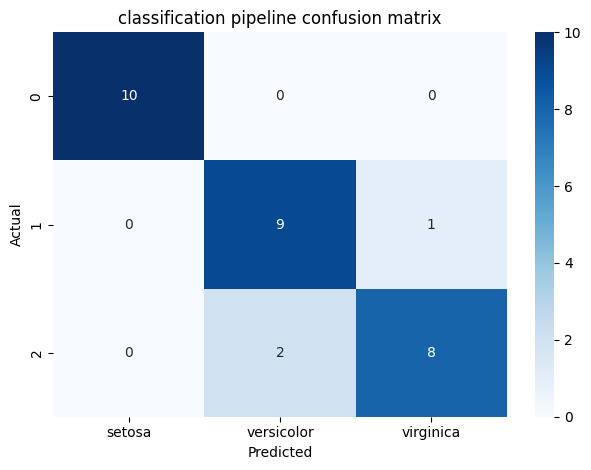

In [9]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d',xticklabels=labels)
plt.title("classification pipeline confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


2 virginica wrongly predicted as versicolor
1 versiocolor was wrongly predicted as virginica

In [11]:
errors=y_pred-y_test
errors

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0])

now we will try again the model with cross validation:
for that we will set up a new pipeline and initiate cross validated grid search onto the pipeline

In [25]:
#initiating the pipeline
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('knn',KNeighborsClassifier())
])
#parameters for grid search
param_grid = {
    'pca__n_components':[2,3],
    'knn__n_neighbors':[3,5,7]
    }

In [26]:
#choosing and initiating a cross validation
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
#we are choosing 5 folds of data to evaluate which one fold makes the model more generalizable to data


as we have initiated parameters for pipeline, hyperparameter tuning and cross validation, now we can generate the best model using GridSearchCV

In [27]:
best_model = GridSearchCV(estimator=pipeline,
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=2
                         )

In [28]:
best_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__n_neighbors': [3, 5, ...], 'pca__n_components': [2, 3]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [29]:
test_score = best_model.score(X_test, y_test)
print(f"{test_score:.3f}")

0.933


In [30]:
best_model.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 3}

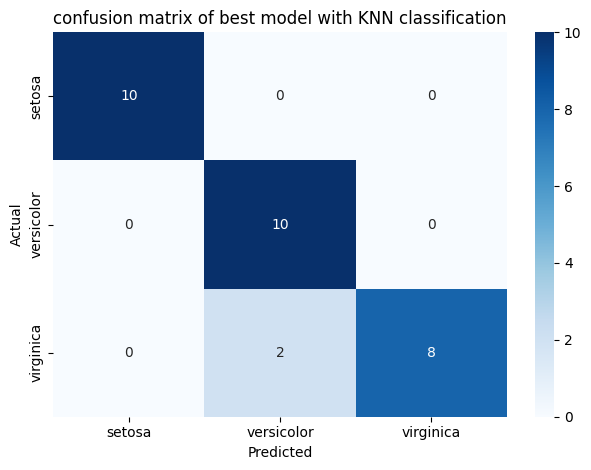

In [31]:
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d',xticklabels=labels,yticklabels=labels)
plt.title("confusion matrix of best model with KNN classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
